# BRI Financial Data Challenge

### Submission by Luthfi Arfiansyah

USECASE:
Goal: Membuat model klasifikasi yang dapat menentukan apakah seorang nasabah akan churn atau tidak.
Model harus dibuat sekurang-kurangnya meliputi :
1. Exploratory data analysis (EDA)
2. Feature Engineering
3. Modeling
4. Model Evaluation

EVALUASI DALAM KOMPETISI: 
Evaluasi dilakukan dengan mengukur performa model yang dilakukan oleh peserta, berdasarkan
performance AUC yang dihasilkan dari data testing.

Data terdiri atas dua dataset, yaitu:
- fin_data_challenge_train.csv: 100.000 baris dan 126 kolom (125 kolom fitur dan 1 kolom target 'y’)
- fin_data_challenge_test.csv: 25.000 baris dan 125 kolom (tanpa kolom target ‘y’)

Deskripsi Kolom
Data Nasabah:
x0-x124 (125 kolom) : _Merupakan data nasabah yang telah dinormalisasi dan dirahasiakan nama kolomnya._

Variabel target:
y - Apakah nasabah akan churn? (1 :iya, 0 :tidak)

Note : terdapat beberapa Missing Value pada data.

File yang dikirimkan memiliki format sebagai berikut:
1. Coding script dalam bentuk ‘nama_lengkap-submission.ipynb’
2. Nama file output (hasil prediksi terhadap data test): 'nama_lengkap-submission.csv' <br /> Kolom: 'Id' dan 'Predicted'. <br />Mohon perhatikan bahwa nama file dan nama kolom bersifat case sensitive.

### Jawaban : 

## _Import Necessary Module_

In [1]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPClassifier

pd.options.mode.chained_assignment = None

## Data Preprocessing

In [2]:
# Deklarasi data csv kedalam variabel
df_train = pd.read_csv('findata_challenge_train.csv') #untuk data training
df_test = pd.read_csv('findata_challenge_test.csv') #untuk data testing

In [3]:
# Memastikan data sudah berhasil dibuka
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0
3,0.005775,-2.726153,2.891378,-0.038325,2.280847,1.761478,3.0,3.0,9.116188,-4.610151,...,5.904901,50.0,1.0,8.194975,-7.798308,10.910515,15.226094,-10.440813,-0.735116,0
4,0.044396,2.803576,-1.923381,-0.116657,-1.574199,6.098627,3.0,1.0,-13.956141,13.785099,...,-14.603703,47.0,0.0,2.330789,-8.249825,-12.680490,40.192302,-5.037065,1.679262,1


In [4]:
df_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
0,0.403735,-1.966104,-1.322339,0.084642,2.481997,-1.719155,5.0,2.0,-11.546670,-7.073770,...,3.580278,-7.765934,59.0,1.0,-9.897690,5.694125,-6.734618,17.052251,3.601040,2.873498
1,0.032128,6.516294,-0.939752,0.026937,-0.992999,5.995462,4.0,3.0,-5.634876,1.937998,...,5.783655,15.667015,47.0,1.0,7.781887,9.752716,5.918369,15.922908,5.460557,10.475816
2,-0.280345,0.930291,-1.028828,-0.050924,-3.164733,6.885108,3.0,2.0,1.609005,-1.812488,...,-0.389116,8.523648,55.0,0.0,6.815214,-3.325532,4.123546,-19.656038,8.380318,-1.203315
3,-0.313420,-0.568857,-1.576051,-0.003607,5.539969,-1.594770,4.0,3.0,-11.517734,-5.364282,...,3.930974,-13.912115,41.0,0.0,3.158137,-7.088875,-3.035983,34.277048,-3.169203,1.417681
4,0.108825,-4.815631,5.491084,-0.123928,-1.932024,4.014821,5.0,3.0,-3.117576,2.004889,...,-4.056091,-14.432712,52.0,0.0,-3.867657,-13.308519,1.008302,41.449381,-0.804560,-0.649453


## Exploratory Data Analysis (EDA) & Feature Engineering

Setelah data berhasil masuk kedalam variabel, Langkah selanjutnya adalah melakukan analisa dan eksplorasi data (EDA) & manipulasi data (). Dari soal diketahui bahwa data telah dinormalisasi dan ada beberapa data yang hilang. Selain itu karena nama kolom data dirahasiakan, maka penting untuk mengetahui bahwa kolom data-data yang ada pada variabel df_train merupakan kolom data kategorikal atau numerikal.

### - Data Classification:  Membagi kolom berdasarkan tipe data

In [5]:
print('--------------------------')
print('Info Data Train:')
print(df_train.info())
print('--------------------------')
print('Info Data Test:')
print(df_test.info())

--------------------------
Info Data Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 126 entries, x0 to y
dtypes: float64(120), int64(1), object(5)
memory usage: 96.1+ MB
None
--------------------------
Info Data Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 125 entries, x0 to x124
dtypes: float64(120), object(5)
memory usage: 23.8+ MB
None


Dari Informasi diatas dapat dilihat bahwa:
- data train memiliki: 120 kolom data bertipe float, 1 kolom data bertipe integer, dan 5 kolom data bertipe object/ non-numeric
- data test memiliki: 120 kolom data bertipe float dan 5 kolom data bertipe object/ non-numeric

Selanjutnya, saya klasifikasikan nama kolom berdasarkan tipe data yang dimiliki.

In [6]:
# Klasifikasi kolom data berdasarkan tipe datanya

df_train_by_type = {
  'int': df_train.select_dtypes(include=['int64']).columns.to_list(),
  'float': df_train.select_dtypes(include=['float64']).columns.to_list(),
  'obj': df_train.select_dtypes(include=['object']).columns.to_list()  
}
df_test_by_type = {
  'int': df_test.select_dtypes(include=['int64']).columns.to_list(),
  'float': df_test.select_dtypes(include=['float64']).columns.to_list(),
  'obj': df_test.select_dtypes(include=['object']).columns.to_list()  
}
print('Kolom data integer pada df_train: ', df_train_by_type['int'], ', banyak data:', len(df_train_by_type['int']))
print('Kolom data object pada df_train: ', df_train_by_type['obj'], ', banyak data:', len(df_train_by_type['obj']))
print('Kolom data float pada df_train: ', df_train_by_type['float'], ', banyak data:', len(df_train_by_type['float']))
print('-------------------------------------------------------------------')
print('Kolom data integer pada df_test: ', df_test_by_type['int'], ', banyak data:', len(df_train_by_type['int']))
print('Kolom data object pada df_test: ', df_test_by_type['obj'], ', banyak data:', len(df_train_by_type['obj']))
print('Kolom data float pada df_test: ', df_test_by_type['float'], ', banyak data:', len(df_train_by_type['float']))
print('-------------------------------------------------------------------')
print('Apakah kolom data int df_train = df_test? ', df_train_by_type['int'] == df_test_by_type['int'])
print('Apakah kolom data object df_train = df_test? ', df_train_by_type['obj'] == df_test_by_type['obj'])
print('Apakah kolom data float df_train = df_test? ', df_train_by_type['float'] == df_test_by_type['float'])
print('-------------------------------------------------------------------')

Kolom data integer pada df_train:  ['y'] , banyak data: 1
Kolom data object pada df_train:  ['x21', 'x79', 'x89', 'x108', 'x112'] , banyak data: 5
Kolom data float pada df_train:  ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120'

Dari data diatas bahwa pada data train dan data test masing masing memiliki 120 data numerikal (tipe _float64_) dan 5 data kategorikal (tipe _object_). Kolom 'y' (tipe _int_) diabaikan karena merupakan _dependent variable_. Selanjutnya saya akan melakukan eksplorasi lanjut dengan mencari data _unique_ pada masing-masing kolom.

In [7]:
# Kalkulasi Unique Data perkolom
unique_per_column = [ len(df_train['x'+str(x)].unique()) for x in range(len(df_train.loc[:, df_train.columns!='y'].columns))  ]
unique_per_column = pd.DataFrame({'Unique Data':unique_per_column, 'Column': ['x'+str(x) for x in range(len(df_train.loc[:, df_train.columns!='y'].columns))]})
unique_per_column = unique_per_column.set_index('Column').T

# Kelompokan data berdasarkan tipe kolom
unique_float = unique_per_column[df_train_by_type['float']].T
unique_obj = unique_per_column[df_train_by_type['obj']].T

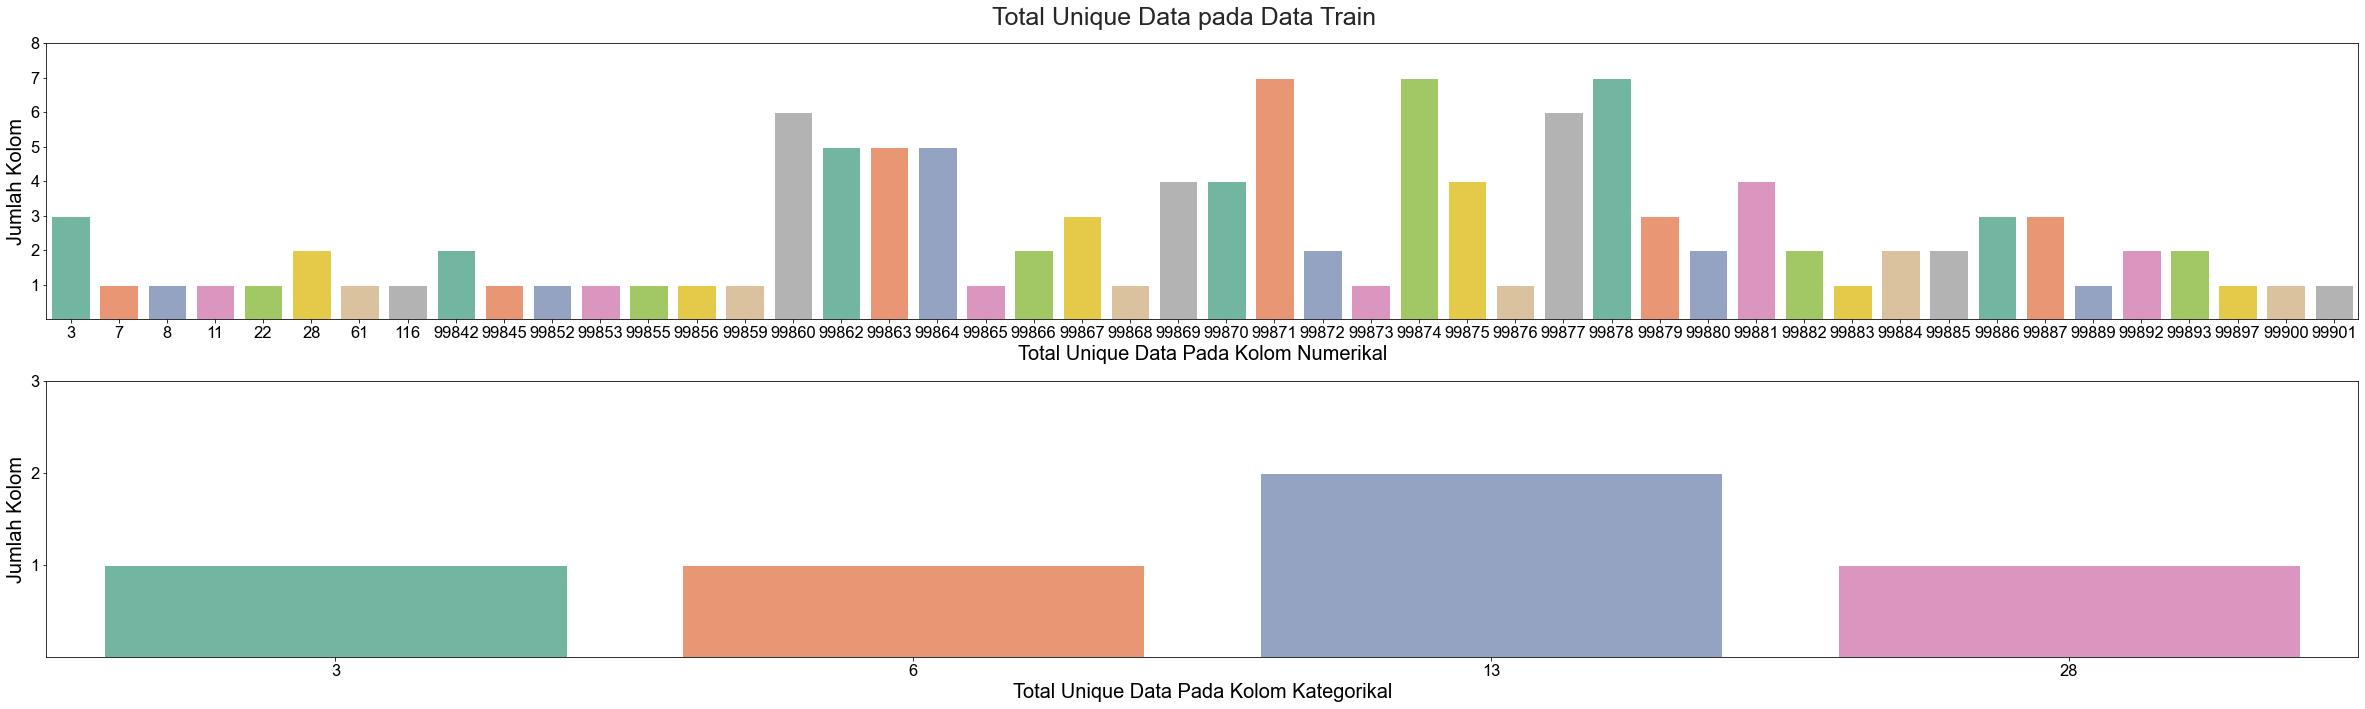

In [8]:
# Plotting
fig,[ax1,ax2] = plt.subplots(2,1, figsize=(33,10))
sns.set_style("whitegrid")
sns.countplot(x="Unique Data", data=unique_float, ax=ax1, palette="Set2")
sns.countplot(x="Unique Data", data=unique_obj, ax=ax2,  palette="Set2")
ax1.set_xlabel('Total Unique Data Pada Kolom Numerikal',fontsize=20)
ax2.set_xlabel('Total Unique Data Pada Kolom Kategorikal',fontsize=20)
ax1.set_ylabel('Jumlah Kolom',fontsize=20)
ax2.set_ylabel('Jumlah Kolom',fontsize=20)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
	label.set_fontsize(16.5)
ax1.set_yticks(np.arange(1,9,1.0))
ax2.set_yticks(np.arange(1,4,1.0))
fig.suptitle('Total Unique Data pada Data Train', fontsize=25)
fig.tight_layout()
plt.show()

Menarik, ada gap total data _unique_ yang besar pada data numerikal. ada kolom data yang memiliki data _unique_ dibawah 200. Hal ini menjadi kontras karena dari 100.000 record data, ada kolom data numerikal yang memiliki nilai data _unique_ dibawah 200. Dengan dasar itu, maka kolom-kolom tersebut saya masukan kedalam kolom data kategorikal.

In [9]:
# List nama kategori kolom numerikal yang akan saya pindahkan ke kategori kolom kategorikal
num_cat = unique_float.loc[unique_float['Unique Data'] < 200].index.to_list()
print('list kolom numerikal yang akan dipindahkan kedalam list kolom kategorikal:')
print(num_cat)

list kolom numerikal yang akan dipindahkan kedalam list kolom kategorikal:
['x6', 'x7', 'x22', 'x51', 'x63', 'x80', 'x93', 'x96', 'x104', 'x117', 'x118']


Berikut proses pemindahan data kolom numerikal yang akan dipindahkan ke tipe kategorikal:

In [10]:
# Membuat fungsi untuk memindahkan kolom dari kelompok float (numerikal) ke object (kategorikal)
def move_num_to_cat (list_col, target_col, source_col):
  def sort_by_length(e):
    return len(e)
  for i in range(len(list_col)):
    if target_col.count(list_col[i]) == 0:
      target_col.append(list_col[i])
      source_col.remove(list_col[i])
  target_col.sort(key=sort_by_length)
  source_col.sort(key=sort_by_length)

In [11]:
# Eksekusi untuk kelompok data train
move_num_to_cat(num_cat, df_train_by_type['obj'], df_train_by_type['float'])
print('data train kategorikal setelah dipindah:', df_train_by_type['obj'], 'banyak data:', len(df_train_by_type['obj']))
print('data train kategorikal setelah dipindah:', df_train_by_type['float'], 'banyak data:', len(df_train_by_type['float']))

data train kategorikal setelah dipindah: ['x6', 'x7', 'x21', 'x79', 'x89', 'x22', 'x51', 'x63', 'x80', 'x93', 'x96', 'x108', 'x112', 'x104', 'x117', 'x118'] banyak data: 16
data train kategorikal setelah dipindah: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x94', 'x95', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111', 'x113', 'x114', 'x115', 'x116', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124'] banyak dat

In [12]:
# Eksekusi untuk kelompok data test
move_num_to_cat(num_cat, df_test_by_type['obj'], df_test_by_type['float'])
print('data test kategorikal setelah dipindah:', df_test_by_type['obj'], 'banyak data:', len(df_test_by_type['obj']))
print('data test kategorikal setelah dipindah:', df_test_by_type['float'], 'banyak data:', len(df_test_by_type['float']))

data test kategorikal setelah dipindah: ['x6', 'x7', 'x21', 'x79', 'x89', 'x22', 'x51', 'x63', 'x80', 'x93', 'x96', 'x108', 'x112', 'x104', 'x117', 'x118'] banyak data: 16
data test kategorikal setelah dipindah: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x94', 'x95', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x105', 'x106', 'x107', 'x109', 'x110', 'x111', 'x113', 'x114', 'x115', 'x116', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124'] banyak data:

In [13]:
# Mengubah tipe data numerikal yang ada pada kolom kategorikal menjadi tipe string agar dideteksi sebagai kolom kategorikal
df_train[df_train_by_type['obj']] = df_train[df_train_by_type['obj']].astype(str)
df_test[df_test_by_type['obj']] = df_test[df_test_by_type['obj']].astype(str)

In [14]:
# Validasi hasil pemindahan kolom
print('--------------------------')
print('Data Train Setelah dilakukan pembagian kolom:')
print(df_train.info())
print('--------------------------')
print('Data Test Setelah dilakukan pembagian kolom:')
print(df_test.info())

--------------------------
Data Train Setelah dilakukan pembagian kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 126 entries, x0 to y
dtypes: float64(109), int64(1), object(16)
memory usage: 96.1+ MB
None
--------------------------
Data Test Setelah dilakukan pembagian kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 125 entries, x0 to x124
dtypes: float64(109), object(16)
memory usage: 23.8+ MB
None


Selanjutnya kita perlu mengetahui unique data pada kolom 'y' untuk menentukan proses pemodelan data selanjutnya.

In [15]:
# Mencari unique data pada kolom 'y'
print('unique data pada kolom "y":', df_train['y'].unique())

unique data pada kolom "y": [0 1]


### - Data Analysis : Memeriksa Korelasi Antar Kolom pada _Data Train_

Pada proses ini, saya akan fokus kepada _Data Train_ karena _Data Train_ penting untuk digunakan sebagai pemodelan. Mencari nilai korelasi antar kolom cukup penting dalam pemodelan. ini untuk menentukan seberapa signifikan kolom tersebut dalam data secara keseluruhan. Kolom yang digunakan adalah kolom yang bersifat numerikal. Dengan metode ini kita dapat memastikan bahwa suatu kolom memiliki pengaruh terhadap kolom lain, dengan begitu kolom-kolom yang tidak signifikan dapat dihilangkan untuk akurasi model.

In [16]:
# data korelasi antar kolom di Data Train
corr = df_train.corr()

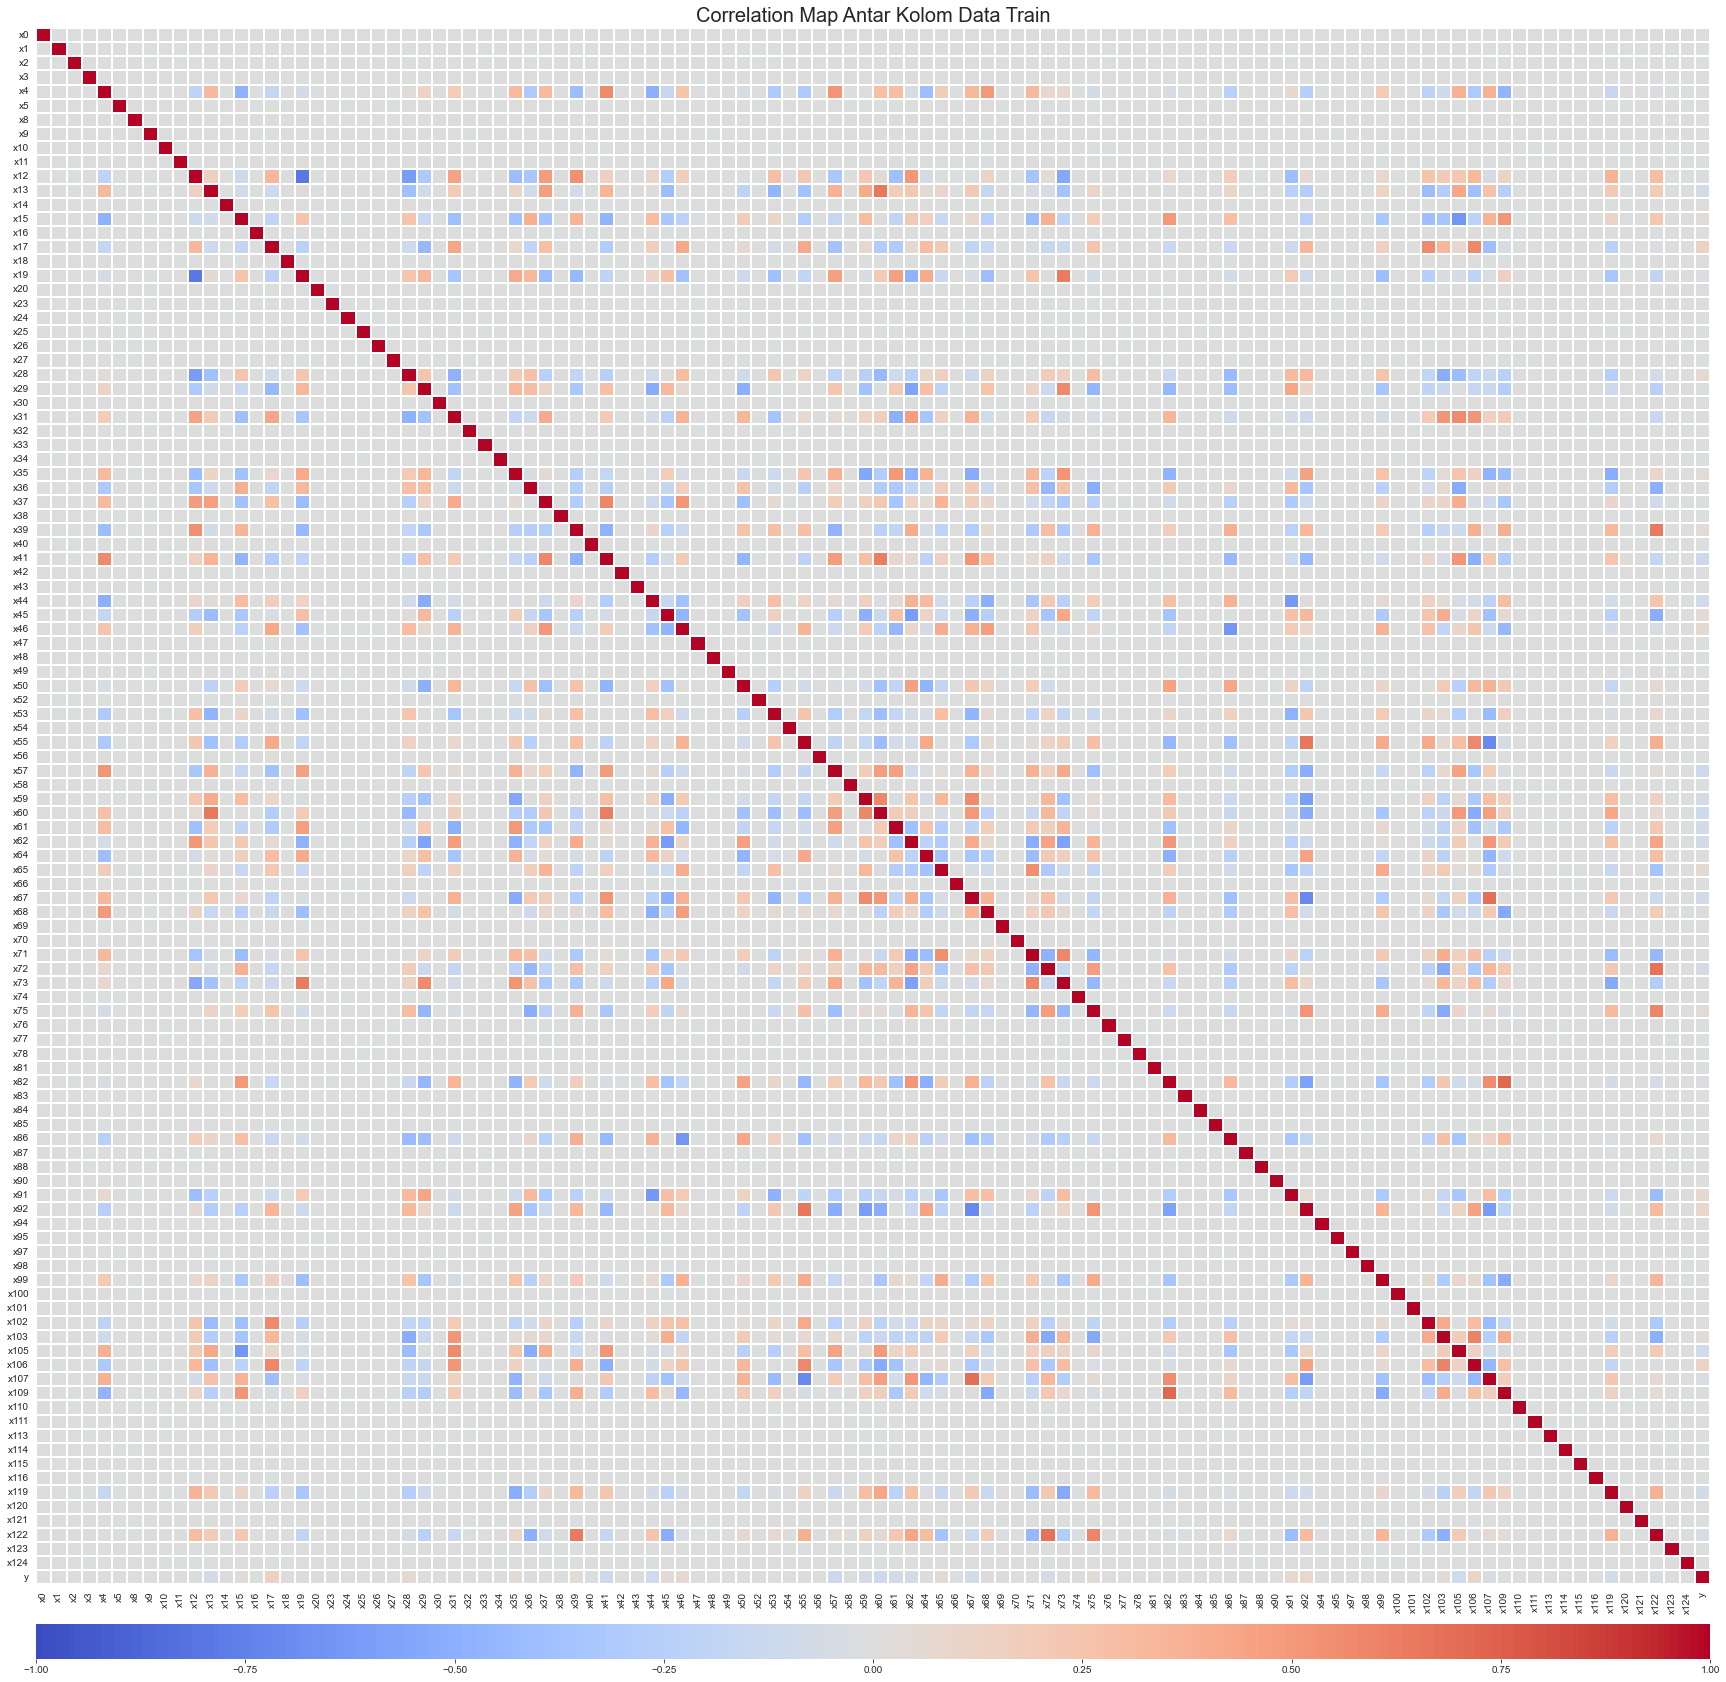

In [17]:
# plot heatmap data korelasi
mask = np.triu(np.ones_like(corr))
fig, (ax,cbar_ax) = plt.subplots(2,figsize=(30,30), gridspec_kw={"height_ratios": (.9, .02), "hspace": .05})
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, linewidths=0.2,ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"}).set_title('Correlation Map Antar Kolom Data Train', fontdict={'size':20})
plt.show()

Dari plot diatas dapat saya interpretasikan bahwa mayoritas korelasi antar kolom tidak memiliki korelasi/ independen. Beberapa kolom memiliki hubungan korelasi yang cukup erat. Gradasi warna merah menunjukan hubungan korelasi positif dan gradasi warna biru menunjukan hubungan korelasi negatif. semakin pekat warnanya, menunjukan semakin kuat hubungan korelasi pada kedua kolom tersebut. Cukup sulit menentukan apakah kolom tersebut berpengaruh signifikan terhadap data dikarenakan nama kolom yang disembunyikan.

Saya akan fokus terhadap korelasi antar kolom _independent_ ('y') dan _dependent_ (kolom 'x' numerikal).

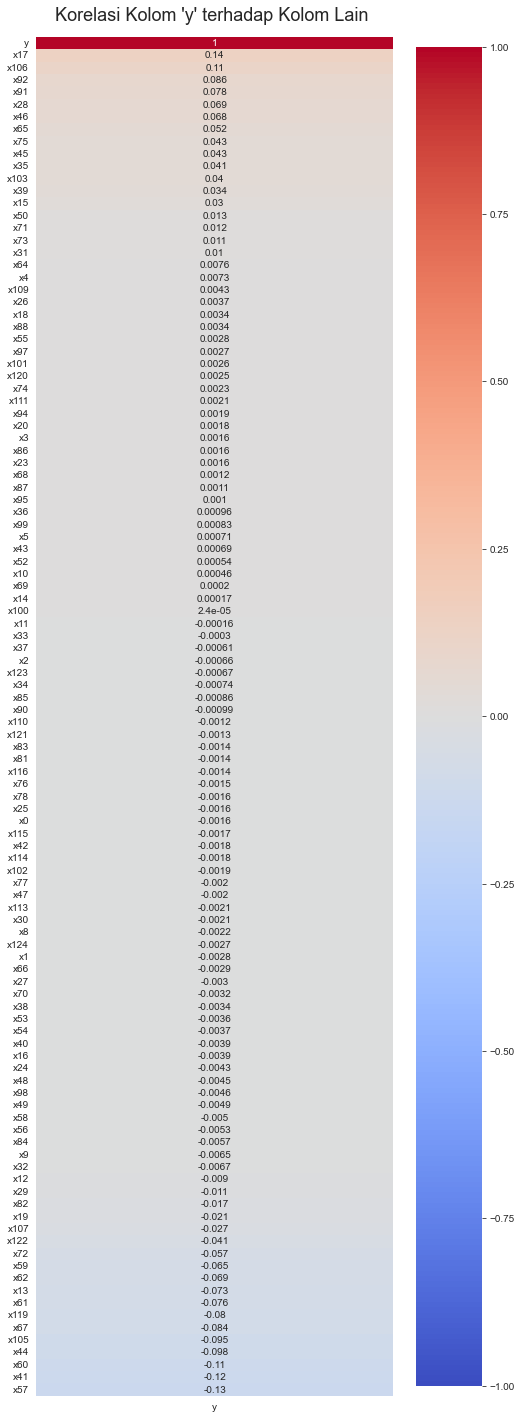

In [18]:
plt.figure(figsize=(8, 25))
heatmap = sns.heatmap(corr[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title("Korelasi Kolom 'y' terhadap Kolom Lain ", fontdict={'fontsize':18}, pad=16)
plt.show()

Dari hasil plot diatas, dapat saya interpretasikan bahwa tidak ada kolom numerikal yang memiliki korelasi yang signifikan terhadap kolom 'y' karena nilainya berada di antara 0.14 sampai -0.13 dari skala 1 sampai -1. Dengan kata lain, semua kolom numerikal memiliki korelasi yang hampir sama terhadap kolom 'y'. Atas dasar itu, semua kolom numerikal akan dimasukan kedalam pemodelan.

### - Data Analysis : Memeriksa Nilai Kosong pada _Data Train_

Dalam melakukan pemodelan, setiap baris data pada setiap kolom harus terisi nilai. Maka dari itu, harus dilakukan pemeriksaan terlebih dahulu pada _Data Train_ apakah ada data yang kosong (NaN/Null).

In [19]:
# Eksplorasi Data NaN pada Data Train 
null_in_train = df_train.isnull().sum().to_frame('Total NaN')
null_in_train['Percentage'] = null_in_train['Total NaN']*100 / 100000
null_in_train.T

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
Total NaN,123.000,131.000,124.000,115.000,137.000,116.000,0.0,0.0,134.000,130.00,...,123.000,0.0,0.0,122.000,120.00,129.000,127.000,130.00,123.000,0.0
Percentage,0.123,0.131,0.124,0.115,0.137,0.116,0.0,0.0,0.134,0.13,...,0.123,0.0,0.0,0.122,0.12,0.129,0.127,0.13,0.123,0.0


In [20]:
# Periksa kolom data yang tidak memiliki nilai null / nan
df_train_with_null = null_in_train.loc[null_in_train['Total NaN'] <=0].index
df_train_with_null

Index(['x6', 'x7', 'x21', 'x22', 'x51', 'x63', 'x79', 'x80', 'x89', 'x93',
       'x96', 'x104', 'x108', 'x112', 'x117', 'x118', 'y'],
      dtype='object')

kolom kategorikal dan kolom 'y' tidak memiliki nilai null atau NaN. Nilai Null atau NaN pada kolom kategorikal sudah diubah menjadi string pada proses sebelumnya. karena itu kolom kategorikal dan kolom 'y' akan di drop sementara karena akan menjadi outliers pada proses pencarian nilai Null/NaN.

In [21]:
# Memeriksa nilai NaN/Null secara statistik
null_in_train.loc[null_in_train['Total NaN'] >0].describe().T

,count,mean,std,min,25%,50%,75%,max
Total NaN,109.0,128.256881,11.310765,100.0,122.000,127.000,137.000,159.000
Percentage,109.0,0.128257,0.011311,0.1,0.122,0.127,0.137,0.159


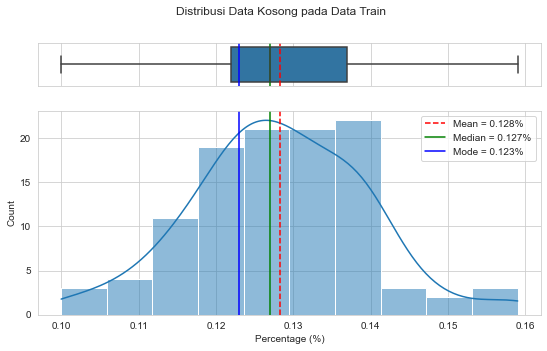

In [22]:
# kolom data y dan yang bertipe kategorikal tidak memiliki nilai NaN, maka tidak dimasukan ke dalam plot
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True, gridspec_kw= {"height_ratios": (0.21, 1)}, figsize=(9,5))
mean = null_in_train.loc[null_in_train['Total NaN'] > 0].Percentage.mean()
median = null_in_train.loc[null_in_train['Total NaN'] > 0].Percentage.median()
mode = null_in_train.loc[null_in_train['Total NaN'] > 0].Percentage.mode()[0]

sns.boxplot(data=null_in_train.loc[null_in_train['Total NaN'] > 0], x='Percentage',  ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=null_in_train.loc[null_in_train['Total NaN'] > 0], x='Percentage', kde=True, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean = " + str("{:.3f}".format(mean)) + '%')
ax_hist.axvline(median, color='g', linestyle='-', label="Median = " + str("{:.3f}".format(median))+ '%')
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode = " + str("{:.3f}".format(mode))+ '%')

ax_hist.legend()

ax_box.set(xlabel='')
ax_hist.set(xlabel='Percentage (%)')
f.suptitle('Distribusi Data Kosong pada Data Train')
plt.show()

fDari nilai statistik dan hasil plotting, dapat disimpulkan bahwa jumlah rata-rata data NaN/Null pada perkolom pada data numerikal di _data train_ adalah 0.128% dari total data. Cukup kecil dan tidak terlalu signifikan apabila kita rubah data NaN tersebut dengan nilai _mean_ dari kolom yang berkaitan.

### - Data Preparation : _Label Encoding_ untuk Kolom Kategorikal pada _Data Train_

Data dengan tipe kategorikal harus dirubah kedalam nilai numerikal. Untuk itu kita gunakan fungsi _LabelEncoder_ pada modul sklearn.

In [23]:
# X untuk independent variables
# y untuk dependent variable
X = df_train.loc[:, df_train.columns != 'y']
y = df_train['y']
for column in X.columns:
    if X[column].dtype == np.number: continue
    # Melakukan label encoding untuk setiap kolom non-numerik
    X[column] = LabelEncoder().fit_transform(X[column])

C:\Users\LUTHFI~1\AppData\Local\Temp/ipykernel_14340/1946452041.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if X[column].dtype == np.number: continue


### - Data Preparation : Membagi _Data Train_ untuk _Training_ dan _Validation_

_Data Train_ akan dibagi menjadi dua bagian untuk keperluan _training_ dan _validation_.

In [24]:
# Pembagian data menjadi 2 bagian, Training dan Validation pada variabel X dan y.
# Pembagian dilakukan dengan porsi 90% untuk training dan 10% untuk validasi
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=1)

### - Data Preparation : Mengisi Nilai Kosong (NaN/Null) pada _Data Train_

Setelah data dibagi menjadi dua bagian, proses selanjutnya adalah mengisi nilai kosong (NaN/Null) pada tiap-tiap kolom. Karena hasil analisis sebelumnya bahwa rata-rata hanya 0.128% data yang kosong dari setiap kolom, maka kita masukan nilai _mean_ dari tiap-tiap kolom untuk mengisi nilai kosong.

In [25]:
# Mengisi data kosong dengan nilai rata-rata dari kolom yang bersangkutan
for i in df_train_by_type['float']:
  mean_to_fill_train = X_train[i].mean()
  X_train[i].fillna(mean_to_fill_train, inplace=True)
  mean_to_fill_test = X_validation[i].mean()
  X_validation[i].fillna(mean_to_fill_test, inplace=True)

## Data Modelling 

### Data Modelling : Membuat Model

Dari komposisi Data Train dan jumlah unique data pada kolom _dependent variable_ 'y' kita dapat memastikan bahwa pada kasus ini adalah proses pemodelan _classification supervised learning_.

Saya telah melakukan pemodelan data dengan berbagai metode seperti _Random Forest_, _Decision Tree_, _SVC_, _Multi-layer Perceptron_ (MLP), dan lain-lain. Dari hasil percobaan saya, Algoritma pemodelan MLP yang paling baik dengan parameter tingkat akurasi prediksi dan waktu proses pemodelan. Dengan algoritma pemodelan yang lain, tingkat akurasi prediksi antara 82% - 88% dan waktu proses pemodelan diatas 1 menit. Ketika menggunakan MLP, tingkat akurasi prediksi yang didapat antara 87% - 92% dengan waktu pemodelan paling cepat sekitar 30s. Atas dasar tersebut, untuk case ini saya akan menggunakan algoritma MLP untuk pembuatan model datanya.

Selain itu nilai alpha=1 dan activation _logistic_ juga dipilih karena hasil _trial and error_.

In [26]:
# Pemodelan dengan menggunakan bantuan library SKlearn
mod = MLPClassifier(alpha=1, max_iter=1000, activation='logistic' ,verbose=True)
mod = mod.fit(X_train, y_train)

Iteration 1, loss = 0.42718472
Iteration 2, loss = 0.37027376
Iteration 3, loss = 0.35963769
Iteration 4, loss = 0.35602649
Iteration 5, loss = 0.35350707
Iteration 6, loss = 0.35289210
Iteration 7, loss = 0.35147045
Iteration 8, loss = 0.35059717
Iteration 9, loss = 0.35053581
Iteration 10, loss = 0.34983516
Iteration 11, loss = 0.34980083
Iteration 12, loss = 0.34916722
Iteration 13, loss = 0.34956497
Iteration 14, loss = 0.34924465
Iteration 15, loss = 0.34916018
Iteration 16, loss = 0.34905078
Iteration 17, loss = 0.34865342
Iteration 18, loss = 0.34874926
Iteration 19, loss = 0.34903150
Iteration 20, loss = 0.34893302
Iteration 21, loss = 0.34870333
Iteration 22, loss = 0.34921152
Iteration 23, loss = 0.34837956
Iteration 24, loss = 0.34840541
Iteration 25, loss = 0.34872463
Iteration 26, loss = 0.34881362
Iteration 27, loss = 0.34880327
Iteration 28, loss = 0.34853929
Iteration 29, loss = 0.34854401
Iteration 30, loss = 0.34818963
Iteration 31, loss = 0.34884482
Iteration 32, los

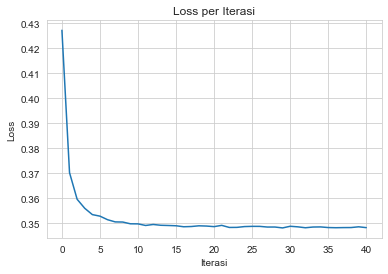

In [27]:
# Plot loss per iterasi dari hasil pemodelan.
sns.lineplot(data=mod.loss_curve_).set(xlabel='Iterasi', ylabel='Loss', title='Loss per Iterasi')
plt.show()

Setelah melakukan pemodelan, lalu kita lakukan prediksi dari data 'X_validation' dengan menggunakan model yang kita train.

In [28]:
# Validasi Model
y_pred = mod.predict(X_validation)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

nilai prediksi dari 'X_validation' dengan model, kemudian kita bandingkan dengan nilai 'y_validation' dalam bentuk _confussion matrix_. Setelah itu, nilai akurasi dari model dapat kita kalkulasi.

In [29]:
# Confussion Matrix untuk menghitung akurasi dan validasi dari model
pred_table = pd.DataFrame(confusion_matrix(y_true=y_validation, y_pred=y_pred), columns=['Predicted 0','Predicted 1'], index=['Actual 0','Actual 1'])
pred_table

,Predicted 0,Predicted 1
Actual 0,8206,80
Actual 1,961,753


In [30]:
# Menghitung akurasi model
mod_acc = ((pred_table.iloc[0,0]+pred_table.iloc[1,1]) / (pred_table.iloc[0].sum()+pred_table.iloc[1].sum()))*100
print('akurasi model : ', mod_acc,'%')

akurasi model :  89.59 %


In [31]:
# Classification Report
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8286
           1       0.90      0.44      0.59      1714

    accuracy                           0.90     10000
   macro avg       0.90      0.71      0.77     10000
weighted avg       0.90      0.90      0.88     10000



In [32]:
# Menghitung Mean Absolute Error
mean_absolute_error(y_true=y_validation, y_pred=y_pred)

0.1041

## Prediksi Menggunakan _Data Test_ Pada Model dan _Export to CSV_

### - Data Analysis : Memeriksa Nilai Kosong (NaN/Null) pada _Data Test_

Sama seperti proses pada _Data Train_, _Data Test_ juga perlu dilakukan proses analisis untuk memeriksa nilai-nilai kosong NaN/Null pada data.

In [33]:
# Eksplorasi Data NaN pada Data Train 
null_in_test = df_test.isnull().sum().to_frame('Total NaN')
null_in_test['Percentage'] = null_in_test['Total NaN']*100 / 100000
null_in_test.T

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124
Total NaN,40.00,30.00,26.000,27.000,39.000,36.000,0.0,0.0,32.000,38.000,...,32.000,29.000,0.0,0.0,26.000,38.000,39.000,34.000,46.000,42.000
Percentage,0.04,0.03,0.026,0.027,0.039,0.036,0.0,0.0,0.032,0.038,...,0.032,0.029,0.0,0.0,0.026,0.038,0.039,0.034,0.046,0.042


In [34]:
# Periksa kolom data yang tidak memiliki nilai null / nan
df_test_with_null = null_in_test.loc[null_in_train['Total NaN'] <=0].index
df_test_with_null

Index(['x6', 'x7', 'x21', 'x22', 'x51', 'x63', 'x79', 'x80', 'x89', 'x93',
       'x96', 'x104', 'x108', 'x112', 'x117', 'x118'],
      dtype='object')

Kolom kategorikal dan kolom 'y' tidak memiliki nilai null atau NaN. Nilai Null atau NaN pada kolom kategorikal sudah diubah menjadi string pada proses sebelumnya. karena itu kolom kategorikal dan kolom 'y' akan di drop sementara karena akan menjadi outliers pada proses pencarian nilai Null/NaN.

In [35]:
# Memeriksa nilai NaN/Null secara statistik
null_in_train.loc[null_in_train['Total NaN'] >0].describe().T

,count,mean,std,min,25%,50%,75%,max
Total NaN,109.0,128.256881,11.310765,100.0,122.000,127.000,137.000,159.000
Percentage,109.0,0.128257,0.011311,0.1,0.122,0.127,0.137,0.159


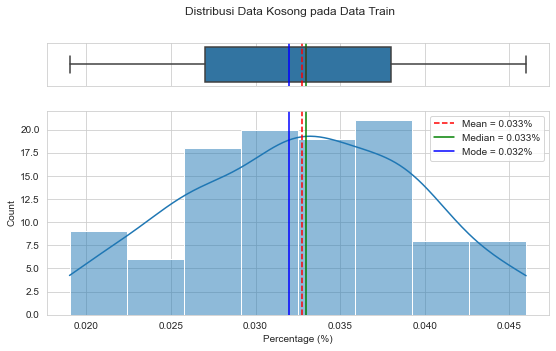

In [36]:
# kolom data y dan yang bertipe kategorikal tidak memiliki nilai NaN, maka tidak dimasukan ke dalam plot
f, (ax_box, ax_hist) = plt.subplots(2,sharex=True, gridspec_kw= {"height_ratios": (0.21, 1)}, figsize=(9,5))
mean = null_in_test.loc[null_in_train['Total NaN'] > 0].Percentage.mean()
median = null_in_test.loc[null_in_train['Total NaN'] > 0].Percentage.median()
mode = null_in_test.loc[null_in_train['Total NaN'] > 0].Percentage.mode()[0]

sns.boxplot(data=null_in_test.loc[null_in_test['Total NaN'] > 0], x='Percentage',  ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=null_in_test.loc[null_in_test['Total NaN'] > 0], x='Percentage', kde=True, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean = " + str("{:.3f}".format(mean)) + '%')
ax_hist.axvline(median, color='g', linestyle='-', label="Median = " + str("{:.3f}".format(median))+ '%')
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode = " + str("{:.3f}".format(mode))+ '%')

ax_hist.legend()

ax_box.set(xlabel='')
ax_hist.set(xlabel='Percentage (%)')
f.suptitle('Distribusi Data Kosong pada Data Train')
plt.show()

Dari nilai statistik dan hasil plotting, dapat disimpulkan bahwa jumlah rata-rata data NaN/Null pada perkolom pada data numerikal di _data test_ adalah 0.033% dari total data. Cukup kecil dan tidak terlalu signifikan apabila kita rubah data NaN tersebut dengan nilai _mean_ dari kolom yang berkaitan.

### - Data Preparation : _Label Encoding_ untuk Kolom Kategorikal pada _Data Test_

In [37]:
# X untuk independent variables
# y untuk dependent variable# 
X_test = df_test
for column in X.columns:
    if X_test[column].dtype == np.number: continue
    # Melakukan label encoding untuk setiap kolom non-numerik
    X_test[column] = LabelEncoder().fit_transform(X_test[column])

C:\Users\LUTHFI~1\AppData\Local\Temp/ipykernel_14340/1510193198.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if X_test[column].dtype == np.number: continue


### - Data Preparation : Mengisi Nilai Kosong (NaN/Null) pada _Data Test_

Nilai kosong pada _data test_ juga perlu diisi sebelum melakukan prediksi dengan cara yang sama seperti yang telah dilakukan pada _data train_ sebelum melakukan prediksi.

In [38]:
# Mengisi data kosong dengan nilai rata-rata dari kolom yang bersangkutan
for i in df_test_by_type['float']:
  mean_to_fill_test = X_test[i].mean()
  X_test[i].fillna(mean_to_fill_test, inplace=True)

### - _Prediction Result_ menggunakan _Data Test_

Melakukan prediksi menggunakan model yang telah dibuat sebelumnya dengan menggunakan _data test_. hasil prediksi ini yang akan menjadi jawaban akhir dari soal ini.

In [39]:
pred_result = pd.DataFrame(mod.predict(X_test), columns=['Predicted'])
pred_result.index.name = 'Id'
pred_result.T

Id,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
Predicted,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
print('customer yang akan churn pada data test:', len(pred_result.loc[pred_result['Predicted'] == 1]))
print('customer yang tidak akan churn pada data test:', len(pred_result.loc[pred_result['Predicted'] == 0]))

customer yang akan churn pada data test: 2125
customer yang tidak akan churn pada data test: 22875


### - Menyimpan Hasil Prediksi Ke dalam _file_ .csv

In [41]:
# Menyimpan hasil prediksi ke file .csv
pred_result.to_csv('Luthfi_Arfiansyah-submission.csv')

In [42]:
# Memastikan file .csv sudah benar
pd.read_csv('Luthfi_Arfiansyah-submission.csv')

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
24995,24995,0
24996,24996,0
24997,24997,1
24998,24998,0
